# model load

In [22]:
import os
import sys
from feedback_algorithm.closeup_fb import *
from feedback_algorithm.locateframe_fb import *
sys.path.append('/root/Edwin/hand-detection-YoloKeras')
from load_hdmodel import *
from get_interpretation import *
import cv2

In [3]:
model_hand = load_hdmodel()

model path: /root/Edwin/hand-detection-YoloKeras/pretrain/


/root/team3/yes/envs/YoloKeras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
model_hand

# image load

In [5]:
img_path = '/root/Edwin/hand-detection-YoloKeras/hand/5.jpg'
save_path = './result.png'

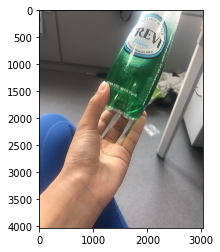

In [6]:
img=cv2.imread(img_path, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

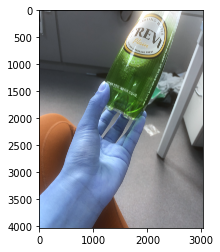

In [7]:
preporcessed_img , img_cv = preprocess_img(img)
plt.imshow(img_cv)

# prediction

In [8]:
start = time.time()
out2 = model_hand.predict(preporcessed_img)[0]
end = time.time()
print('prediction time:',end-start)

prediction time: 0.40152883529663086


In [9]:
print(out2)

[[[-1.20927167e+00 -5.07949293e-01 -6.51894450e-01 ...  3.47013205e-01
   -7.69823503e+00  4.30067480e-01]
  [-1.54743701e-01 -8.56759191e-01  5.99759459e-01 ... -1.44563884e-01
   -7.66697598e+00  2.01812133e-01]
  [-5.45659781e-01 -8.92046869e-01  6.70344949e-01 ...  1.39574092e-02
   -7.96220016e+00  9.17627960e-02]
  ...
  [-5.46029150e-01 -8.59989703e-01  7.50354707e-01 ... -2.08883777e-01
   -6.84209585e+00  2.28545845e-01]
  [-1.55267969e-01 -4.24485058e-01  1.01236749e+00 ... -1.74521893e-01
   -6.61187887e+00  3.32422331e-02]
  [ 1.11617732e+00  6.47097170e-01  2.19641298e-01 ...  4.36778255e-02
   -5.66632318e+00 -2.85428762e-01]]

 [[-2.09421873e+00 -7.92986155e-01 -1.74245059e+00 ... -9.04017687e-02
   -8.34366608e+00  5.26822031e-01]
  [-3.29820156e-01 -7.92760611e-01 -5.67212880e-01 ... -4.38733041e-01
   -8.10048485e+00  3.93194735e-01]
  [-5.10537326e-01 -8.01147342e-01 -7.02353418e-01 ... -2.33408108e-01
   -8.48142052e+00  2.37274274e-01]
  ...
  [-7.77943790e-01  4.3

# Interpretation

In [10]:
results = interpret_output_yolov2(out2, img.shape[1], img.shape[0])
print(results)


[['hand', 2921.861719450575, 215.43390592296058, 247.96159652046197, 593.6508956230722, 0.44808978], ['hand', 1040.778998157461, 2720.5067365162618, 1120.0462131756017, 2051.0299179606272, 0.813624]]


# Show Results and Save

len results: 2


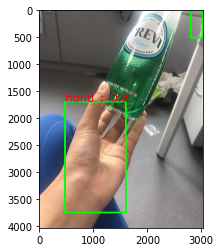

In [11]:
#Age and Gender Detection
img_cp=show_results(img_cv,results, img.shape[1], img.shape[0])
plt.imshow(img_cp)
plt.imsave(save_path,img_cp)

# Get CloseUp Feedback 

In [12]:
frame_size = img_cp.shape
generate_closeup_fb(results,frame_size)

'far'

In [41]:
#display result
def show_results(img,results, img_width, img_height, fb_str):
	img_cp = img.copy()
	print('len results:',len(results))
	img_cp1 = cv2.cvtColor(img_cp, cv2.COLOR_BGR2RGB)
	if len(results) == 0:
		cv2.putText(img_cp1,fb_str,(img_width//2,img_height//2),cv2.FONT_HERSHEY_SIMPLEX,5,(255,0, 0), 10 , cv2.LINE_AA)
		return img_cp1
        
	for i in range(len(results)):
		x = int(results[i][1])
		y = int(results[i][2])
		w = int(results[i][3])//2
		h = int(results[i][4])//2

		xmin,xmax,ymin,ymax=crop(x,y,w,h,1.0,img_width,img_height)

		cv2.rectangle(img_cp1,(xmin,ymin),(xmax,ymax),(0,255,0), 30)
		cv2.rectangle(img_cp1,(xmin,ymin-20),(xmax,ymin),(125,125,125),-1)
		cv2.putText(img_cp1,results[i][0] + ' : %.2f' % results[i][5],(xmin+5,ymin-7),cv2.FONT_HERSHEY_SIMPLEX,5,(255,0, 0), 10 , cv2.LINE_AA)
		cv2.putText(img_cp1,fb_str,(img_width//2,img_height//2),cv2.FONT_HERSHEY_SIMPLEX,3,(255,0, 0), 10 , cv2.LINE_AA)
	return img_cp1 #cv2.imshow('YoloKerasHandDetection',img_cp)


In [43]:
def get_result(img_path,img_name, dst_dir):
  file_name = os.path.join(dst_dir,img_name[:-4]+'_close_far_locate_frame_fb.png')
  img=cv2.imread(img_path, cv2.IMREAD_COLOR)
  img = img[...,::-1]  #BGR 2 RGB
  inputs = img.copy() / 255.0
  
  img_cv = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  img_camera = cv2.resize(inputs, (416,416))
  img_camera = np.expand_dims(img_camera, axis=0)
  start = time.time()
  out2 = model_hand.predict(img_camera)[0]
  end = time.time()
  print('prediction time:',end-start)
  start = time.time()
  results = interpret_output_yolov2(out2, img.shape[1], img.shape[0])
  end = time.time()
  print('interpret time:',end-start)
  
  frame_size = img_cv.shape
  start = time.time()
  fb_str, stable_results = generate_closeup_fb_wb(results,frame_size)
  end = time.time()
  print('closeup feedback generation time : ',end-start)
  if fb_str == 'Stage 1 clear':
    start = time.time()
    fb_str = generate_locateframe_fb(stable_results,frame_size)
    end = time.time()
    print('locate frame fb generation time : ',end-start)
    fb_str = 'St1clr!' + fb_str
  #Age and Gender Detection
  img_cp=show_results(img_cv,stable_results, img.shape[1], img.shape[0],fb_str)
  # plt.imshow(img_cp)
  print(file_name)
  plt.imsave(file_name,img_cp)

In [15]:
import os

def experiment_fb(target_subdir,dst_dir):
    
    if not os.path.isdir(dst_dir):
        os.makedirs(dst_dir)

    files = [f for f in os.listdir(target_subdir) if os.path.isfile(os.path.join(target_subdir, f))]
    print(files)

    for i in files:
       file_name = os.path.join(target_subdir,i)
       get_result(file_name, i,dst_dir )

In [42]:
PWD = os.getcwd()
target_dir = '/root/Edwin/hand-detection-YoloKeras/our-dataset/specified-hold-2/'
dst_dir_str = '/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/'
#target_dir = os.path.join(PWD ,target_str)
#dst_dir_str = os.path.join(PWD ,dst_dir_str)

a = os.listdir(target_dir)

In [44]:
print(a)

['jh', 'sh', 'es']


In [45]:
print(target_dir)
print(dst_dir_str)
target_subdirs = [os.path.join(target_dir, direc) for direc in a]
dst_subdirs = [os.path.join(dst_dir_str, direc) for direc in a]

/root/Edwin/hand-detection-YoloKeras/our-dataset/specified-hold-2/
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/


In [46]:
print(target_subdirs)

['/root/Edwin/hand-detection-YoloKeras/our-dataset/specified-hold-2/jh', '/root/Edwin/hand-detection-YoloKeras/our-dataset/specified-hold-2/sh', '/root/Edwin/hand-detection-YoloKeras/our-dataset/specified-hold-2/es']


In [47]:
print(dst_subdirs)

['/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/jh', '/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/sh', '/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es']


In [48]:
for i in range(len(target_subdirs)):
    experiment_fb(target_subdirs[i],dst_subdirs[i])

['IMG_4402.jpg', 'IMG_4425.jpg', 'IMG_4431.jpg', 'IMG_4407.jpg', 'IMG_4432.jpg', 'IMG_4403.jpg', 'IMG_4428.jpg', 'IMG_4427.jpg', 'IMG_4422.jpg', 'IMG_4423.jpg', 'IMG_4398.jpg', 'IMG_4435.jpg', 'IMG_4438.jpg', 'IMG_4416.jpg', 'IMG_4437.jpg', 'IMG_4406.jpg', 'IMG_4430.jpg', 'IMG_4419.jpg', 'IMG_4433.jpg', 'IMG_4436.jpg', 'IMG_4405.jpg', 'IMG_4434.jpg', 'IMG_4413.jpg', 'IMG_4411.jpg', 'IMG_4404.jpg', 'IMG_4408.jpg', 'IMG_4417.jpg', 'IMG_4439.jpg', 'IMG_4424.jpg', 'IMG_4400.jpg', 'IMG_4401.jpg', 'IMG_4421.jpg', 'IMG_4418.jpg', 'IMG_4410.jpg', 'IMG_4420.jpg', 'IMG_4426.jpg', 'IMG_4396.jpg', 'IMG_4412.jpg', 'IMG_4399.jpg', 'IMG_4429.jpg', 'IMG_4409.jpg', 'IMG_4397.jpg', 'IMG_4414.jpg', 'IMG_4415.jpg']
prediction time: 0.10183072090148926
interpret time: 0.006593227386474609
closeup feedback generation time :  9.775161743164062e-06
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/jh/IMG_4402_close_far_locate_frame_fb.png
pred

prediction time: 0.10372066497802734
interpret time: 0.0071413516998291016
closeup feedback generation time :  1.4066696166992188e-05
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/jh/IMG_4408_close_far_locate_frame_fb.png
prediction time: 0.1023399829864502
interpret time: 0.006738185882568359
closeup feedback generation time :  2.8133392333984375e-05
len results: 1
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/jh/IMG_4417_close_far_locate_frame_fb.png
prediction time: 0.10166645050048828
interpret time: 0.007239580154418945
closeup feedback generation time :  1.049041748046875e-05
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/jh/IMG_4439_close_far_locate_frame_fb.png
prediction time: 0.1023108959197998
interpret time: 0.0072786808013916016
closeup feedback generation time :  2.9087066650390

prediction time: 0.10183191299438477
interpret time: 0.007118701934814453
closeup feedback generation time :  9.5367431640625e-06
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/sh/KakaoTalk_20200608_183509264_11_close_far_locate_frame_fb.png
prediction time: 0.10644412040710449
interpret time: 0.007063388824462891
closeup feedback generation time :  9.5367431640625e-06
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/sh/KakaoTalk_20200608_183509264_06_close_far_locate_frame_fb.png
prediction time: 0.10836553573608398
interpret time: 0.0070569515228271484
closeup feedback generation time :  9.059906005859375e-06
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/sh/KakaoTalk_20200608_183509264_15_close_far_locate_frame_fb.png
prediction time: 0.10628223419189453
interpret time: 0.007080

prediction time: 0.10489487648010254
interpret time: 0.0068531036376953125
closeup feedback generation time :  2.765655517578125e-05
len results: 2
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es/KakaoTalk_20200608_221331669_01_close_far_locate_frame_fb.png
prediction time: 0.10860753059387207
interpret time: 0.007126569747924805
closeup feedback generation time :  1.2874603271484375e-05
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es/KakaoTalk_20200608_221127441_12_close_far_locate_frame_fb.png
prediction time: 0.10748887062072754
interpret time: 0.006747245788574219
closeup feedback generation time :  3.0279159545898438e-05
len results: 1
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es/KakaoTalk_20200608_213437458_23_close_far_locate_frame_fb.png
prediction time: 0.10413289070129395
interpret time: 0.

prediction time: 0.10128593444824219
interpret time: 0.00654149055480957
closeup feedback generation time :  8.344650268554688e-06
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es/KakaoTalk_20200608_213437458_04_close_far_locate_frame_fb.png
prediction time: 0.1075584888458252
interpret time: 0.00719141960144043
closeup feedback generation time :  3.504753112792969e-05
locate frame fb generation time :  5.245208740234375e-05
len results: 2
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es/KakaoTalk_20200608_221331669_19_close_far_locate_frame_fb.png
prediction time: 0.10762810707092285
interpret time: 0.007004499435424805
closeup feedback generation time :  8.821487426757812e-06
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es/KakaoTalk_20200608_221331669_11_close_far_locate_frame_fb.png
pred

prediction time: 0.10007023811340332
interpret time: 0.007044792175292969
closeup feedback generation time :  9.298324584960938e-06
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es/KakaoTalk_20200608_221127441_close_far_locate_frame_fb.png
prediction time: 0.1091928482055664
interpret time: 0.007280111312866211
closeup feedback generation time :  2.6226043701171875e-05
locate frame fb generation time :  4.673004150390625e-05
len results: 1
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es/KakaoTalk_20200608_213437458_27_close_far_locate_frame_fb.png
prediction time: 0.10756778717041016
interpret time: 0.007142782211303711
closeup feedback generation time :  1.5735626220703125e-05
len results: 0
/root/Edwin/hand-detection-YoloKeras/our-dataset-result/fb_result/closeuplocateframe/specified-hold-2/es/KakaoTalk_20200608_221331669_04_close_far_locate_frame_fb.png
pre